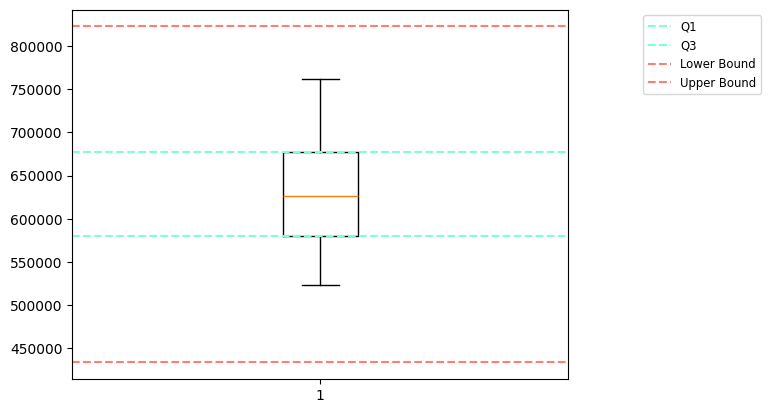

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


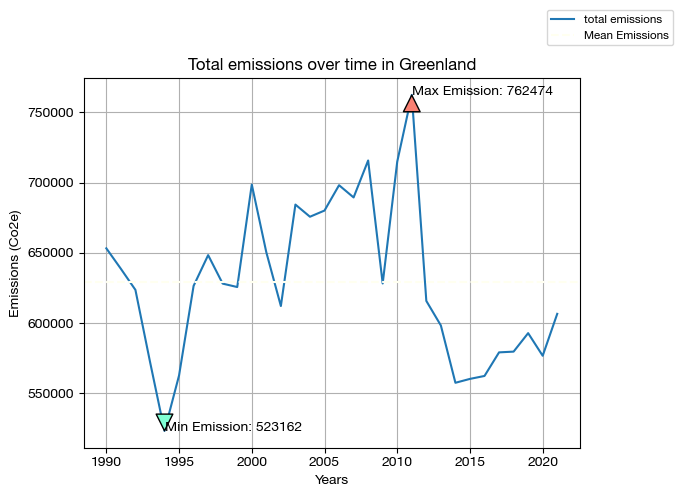

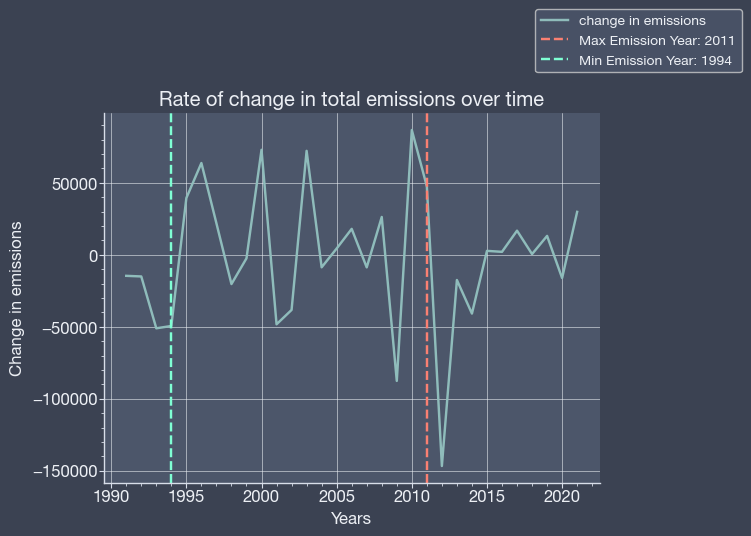

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 6.229180266273012


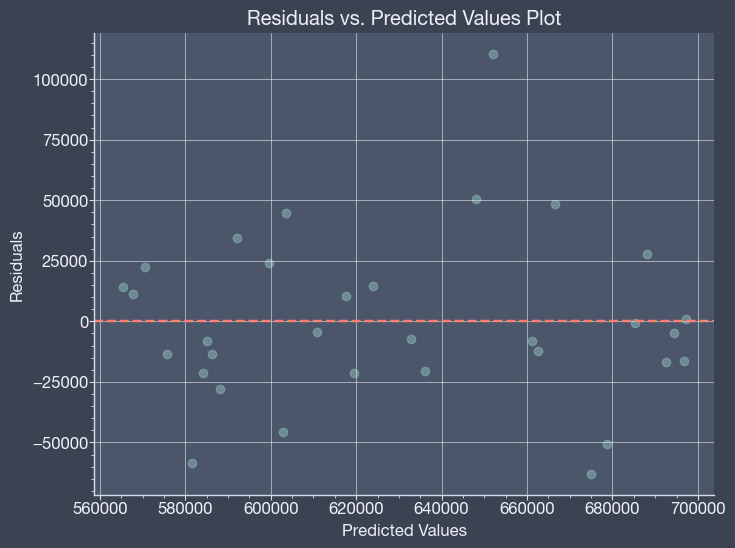

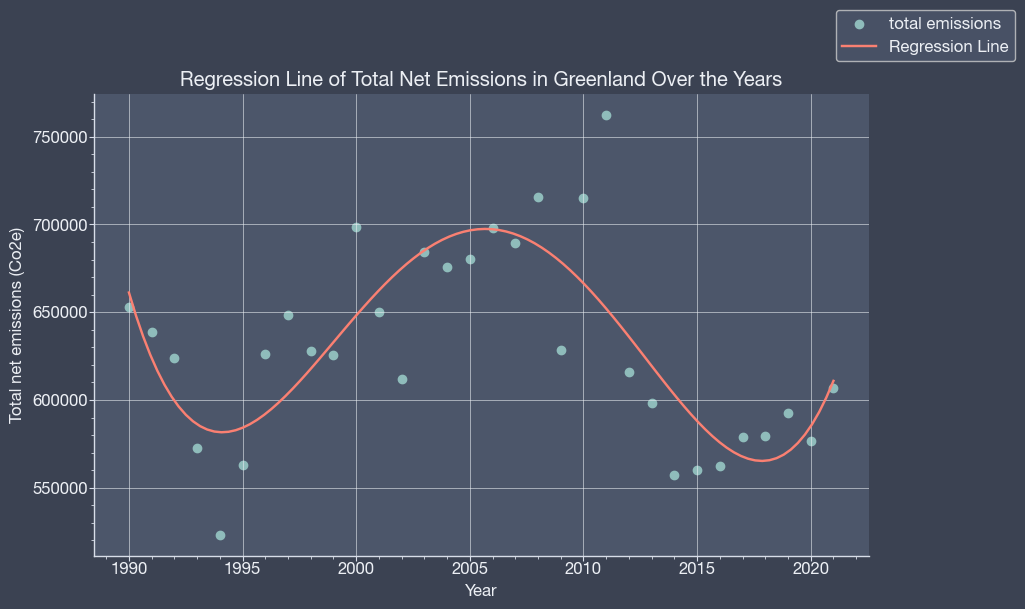

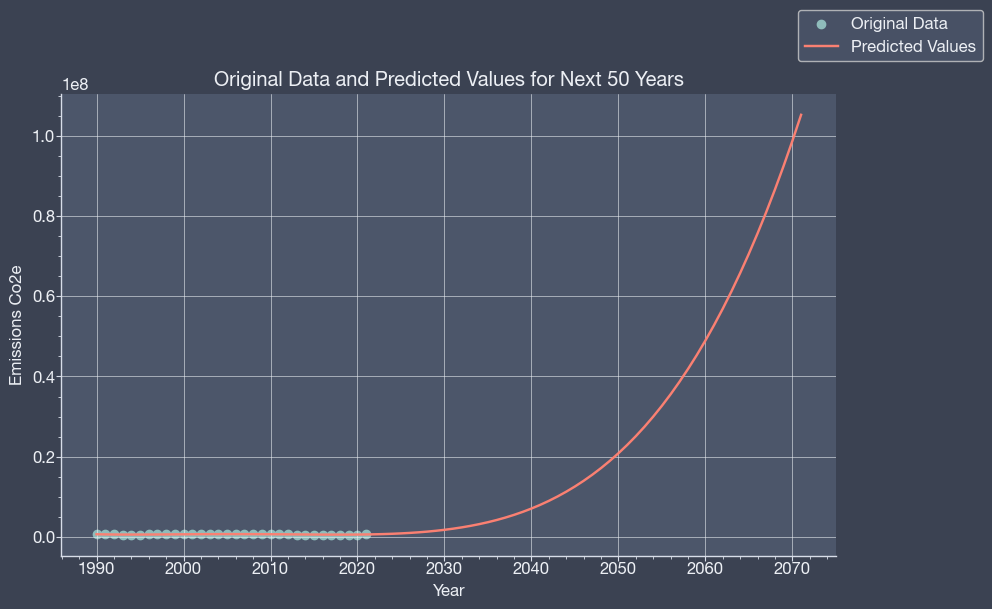

In [2]:
%run greenland_greenhouse_emissions_total.ipynb

In [3]:
forest_df = df[df['sector'].isin(['Total (net emissions)', '5. Forest and Land Use', '  5.A Forest', '  5.B Land Use'])]
forest_df = forest_df.drop(columns=['greenhousegas'])

forest_df.head()

,sector,time,Greenlands total emission of greenhousegasses
0,Total (net emissions),1990,653216
1,Total (net emissions),1991,638634
2,Total (net emissions),1992,623622
3,Total (net emissions),1993,572582
4,Total (net emissions),1994,523162


In [4]:
#get the mean value for forest and land use emissions over the period between 1990-2020
mean_forest_emissions = forest_df[forest_df['sector'] == '5. Forest and Land Use']['Greenlands total emission of greenhousegasses'].mean()
std_dev_forest_emissions = forest_df[forest_df['sector'] == '5. Forest and Land Use']['Greenlands total emission of greenhousegasses'].std()

print(f'The average forest and land use emissions level over the specified period is {mean_forest_emissions} units.\
There is a moderate amount of variability in the emissions data, with emissions values typically deviating \
from the average by approximately {std_dev_forest_emissions} units.')

#select only total fuel emissions, not divided by sub-sector
total_forest_emissions = forest_df[forest_df['sector'] == '5. Forest and Land Use']

#Find the index of the maximum value
max_index = total_forest_emissions['Greenlands total emission of greenhousegasses'].idxmax()

# Get the corresponding year value using the index
max_year = forest_df.loc[max_index, 'time']

# Get the maximum value
max_value = total_forest_emissions['Greenlands total emission of greenhousegasses'].max()

print(f'The maximum value of forest and land use emissions is {max_value} carbon dioxide equivalents (CO2e),corresponding to the year of {max_year}')

#Find the index of the minimum value
min_index = total_forest_emissions['Greenlands total emission of greenhousegasses'].idxmin()

# Get the corresponding year value using the index
min_year = forest_df.loc[min_index, 'time']

# Get the minimum value
min_value = total_forest_emissions['Greenlands total emission of greenhousegasses'].min()

print(f'The minimum value is {min_value} carbon dioxide equivalents (CO2e), corresponding to the year of {min_year}')

The average forest and land use emissions level over the specified period is 812.21875 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 371.8296292463578 units.
The maximum value of forest and land use emissions is 1375 carbon dioxide equivalents (CO2e),corresponding to the year of 2021
The minimum value is 138 carbon dioxide equivalents (CO2e), corresponding to the year of 2002


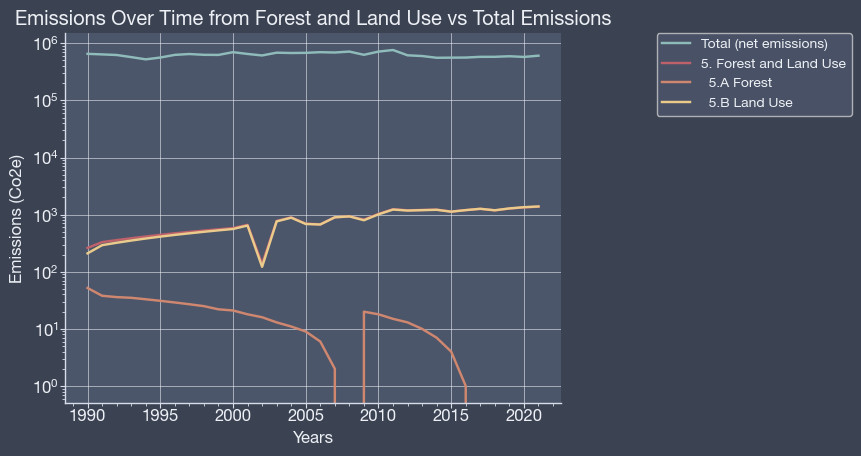

In [15]:
# Iterate over unique values in the 'sector' column
for sector in forest_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = forest_df[forest_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.xlabel('Years')

plt.yscale('log')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Forest and Land Use vs Total Emissions')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from forest and land use vs total.jpg', bbox_inches='tight')

plt.show()

Plot without total net emission to have a clearer understanding of the individuals curves:

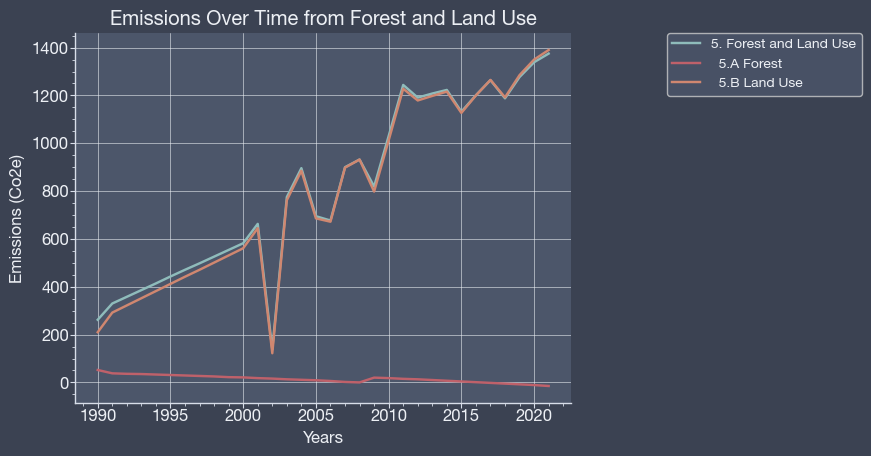

In [14]:
forest2_df = df[df['sector'].isin(['5. Forest and Land Use', '  5.A Forest', '  5.B Land Use'])]

# Iterate over unique values in the 'sector' column
for sector in forest2_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = forest2_df[forest2_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Forest and Land Use')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from forest and land use.jpg', bbox_inches='tight')

plt.show()

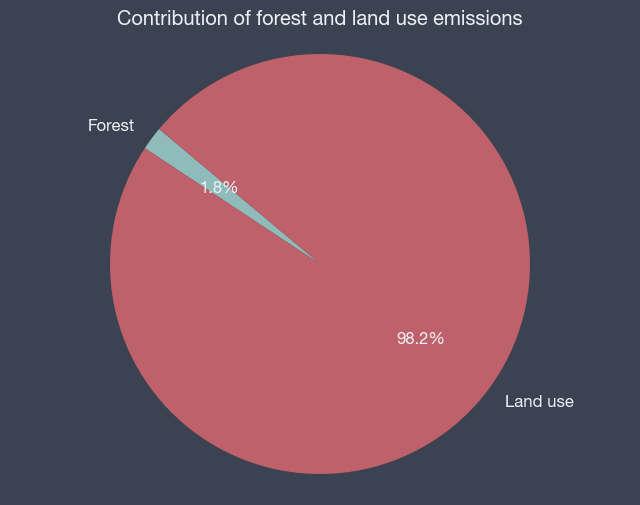

In [16]:
total_emissions = forest_df[forest_df['sector'] == '5. Forest and Land Use']['Greenlands total emission of greenhousegasses'].sum().sum()
forest_emissions = forest_df[forest_df['sector'] == '  5.A Forest']['Greenlands total emission of greenhousegasses'].sum()
land_use_emissions = forest_df[forest_df['sector'] == '  5.B Land Use']['Greenlands total emission of greenhousegasses'].sum()

# Calculate the percentage of forest emissions
percentage_forest_emissions = (forest_emissions / total_emissions) * 100

# Calculate the percentage of land use emissions
percentage_land_use_emissions = (land_use_emissions / total_emissions) * 100

# Create labels for the pie chart
labels = ['Forest', 'Land use']

# Create sizes for the pie chart
sizes = [percentage_forest_emissions,percentage_land_use_emissions]

# Create the pie chart
plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of forest and land use emissions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Contribution of forest and land use emissions.jpg', bbox_inches='tight')

plt.show()